### Flipbook animation - Car

In [ ]:
import pygame
import sys

# Initialize pygame
pygame.init()

# Screen setup
WIDTH, HEIGHT = 800, 300
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Flipbook Car Animation")

# Colors
WHITE = (255, 255, 255)

# Load car images for flipbook effect
car_images = [
    pygame.image.load("car.jpg"),
    pygame.image.load("car2.jpeg"),
    pygame.image.load("car3.jpg")
]

# Scale images
car_images = [pygame.transform.scale(img, (150, 80)) for img in car_images]

# Variables
x_pos = 0
frame = 0
clock = pygame.time.Clock()

# Main loop
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    # Update position
    x_pos += 5
    if x_pos > WIDTH:
        x_pos = -150  # Reset when off screen

    # Update frame for flipbook animation
    frame = (frame + 1) % len(car_images)

    # Draw
    screen.fill(WHITE)
    screen.blit(car_images[frame], (x_pos, HEIGHT // 2 - 40))
    pygame.display.flip()

    clock.tick(10)  # 10 FPS for flipbook effect


SystemExit: 

d:\TARU\College\V th year\Computer Vision Lab\compvis\Lib\site-packages\IPython\core\interactiveshell.py:3680: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Keypoint detector algorithm - Hariss corner

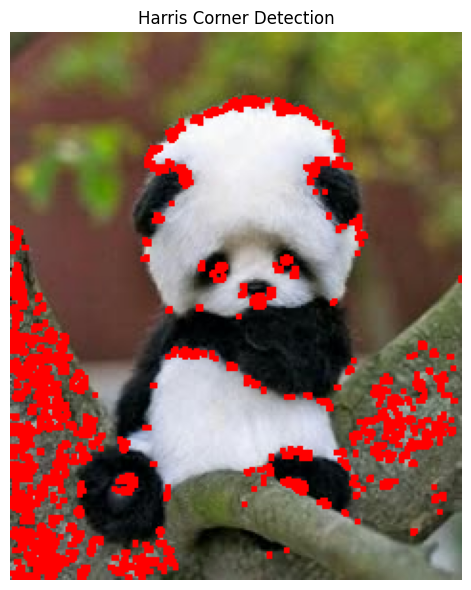

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "panda.jpg"  
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Could not load image from {image_path}")

# Convert to grayscale (float32 is required for Harris)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Apply Harris Corner Detection
# Parameters: blockSize=2, ksize=3, k=0.04
harris_response = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate for better visualization 
harris_response = cv2.dilate(harris_response, None)

# Mark corners on the original image 
threshold = 0.01 * harris_response.max()  # Keep only strong corners
image[harris_response > threshold] = [0, 0, 255]  # Mark in red (BGR)

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result 
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Harris Corner Detection")
plt.axis("off")
plt.tight_layout()
plt.show()


### Two keypoint detector algorithms 
- Hariss Corner Algorithm
- Shi-Tomasi Corner Algorithm

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image and convert to grayscale
image = cv2.imread("panda.jpg")  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_float = np.float32(gray)
harris_dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
harris_dst = cv2.dilate(harris_dst, None)
harris_img = image.copy()
harris_mask = harris_dst > 0.01 * harris_dst.max()
harris_img[harris_mask] = [0, 0, 255]  # Red points
harris_count = np.sum(harris_mask)

# Shi-Tomasi Corner Detection 
shi_corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_img = image.copy()
if shi_corners is not None:
    shi_corners = np.intp(shi_corners)
    for corner in shi_corners:
        x, y = corner.ravel()
        cv2.circle(shi_img, (x, y), 3, (0, 255, 0), -1)  # Green points
shi_count = len(shi_corners)


Number of corners detected:
Harris Corner Detector: 8258
Shi-Tomasi Corner Detector: 100


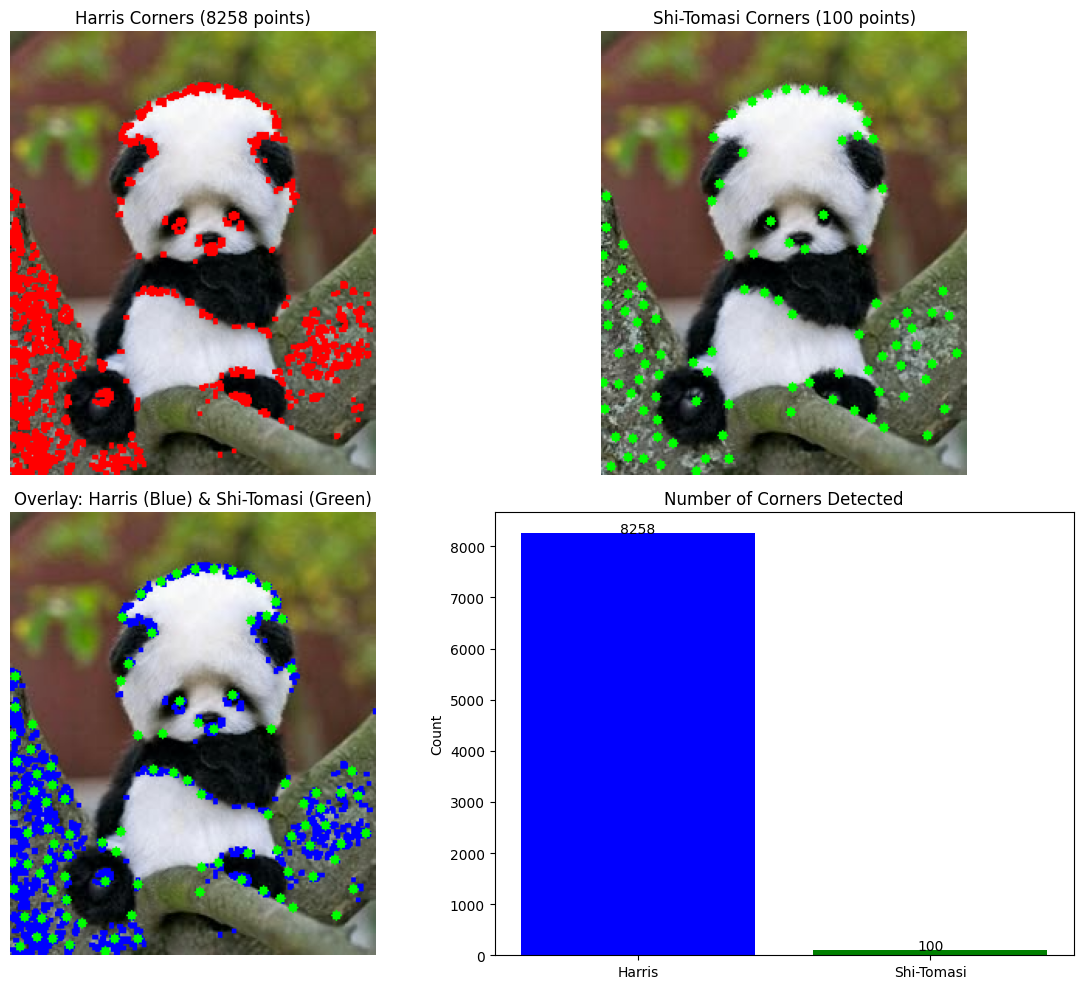

In [ ]:
# Visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Harris
axs[0, 0].imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title(f"Harris Corners ({harris_count} points)")
axs[0, 0].axis("off")

# Combined Overlay
overlay_img = image.copy()
overlay_img[harris_mask] = [255, 0, 0]  # Blue for Harris
if shi_corners is not None:
    for corner in shi_corners:
        x, y = corner.ravel()
        cv2.circle(overlay_img, (x, y), 3, (0, 255, 0), -1)  # Green for Shi-Tomasi

# Print Results 
print("Number of corners detected:")
print(f"Harris Corner Detector: {harris_count}")
print(f"Shi-Tomasi Corner Detector: {shi_count}")

# Shi-Tomasi
axs[0, 1].imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title(f"Shi-Tomasi Corners ({shi_count} points)")
axs[0, 1].axis("off")

# Combined Overlay
axs[1, 0].imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title("Overlay: Harris (Blue) & Shi-Tomasi (Green)")
axs[1, 0].axis("off")

# Bar chart comparison
methods = ['Harris', 'Shi-Tomasi']
counts = [harris_count, shi_count]
axs[1, 1].bar(methods, counts, color=['blue', 'green'])
axs[1, 1].set_title("Number of Corners Detected")
axs[1, 1].set_ylabel("Count")
for i, val in enumerate(counts):
    axs[1, 1].text(i, val + 5, str(val), ha='center')

plt.tight_layout()
plt.show()